<a href="https://colab.research.google.com/github/Stepeech/DataMining/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%E2%84%9612_%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

## Загрузите датасет

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [3]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/news.csv', sep=';')

data.head()

Mounted at /content/drive


,url,title,text,topic,tags,date
0,https://lenta.ru/news/2016/02/01/chunkevich/,Уволенный после извинений перед Мединским прод...,"Продюсер Марек Чункевич, уволенный с польского...",Интернет и СМИ,ТВ и радио,01.02.2016
1,https://lenta.ru/news/2016/02/01/stolicafighti...,После драки двухсот фанатов «Спартака» и ЦСКА ...,Столичные полицейские задержали четырех челове...,Спорт,Летние виды,01.02.2016
2,https://lenta.ru/news/2016/02/01/who/,ВОЗ призвала запретить детям смотреть фильмы с...,Всемирная организация здравоохранения (ВОЗ) пр...,Культура,Кино,01.02.2016
3,https://lenta.ru/news/2016/02/01/shtab/,Строительством «Зенит-Арены» займется штаб Пол...,Губернатор Санкт-Петербурга Георгий Полтавченк...,Спорт,Футбол,01.02.2016
4,https://lenta.ru/news/2016/02/01/tsniimash/,В России построят собственную многоразовую рак...,Роскосмос создаст многоразовую ракету-носитель...,Наука и техника,Космос,01.02.2016


In [4]:
data = data.drop('date', axis=1)
data = data.drop('tags', axis=1)
data = data.drop('url', axis=1)
data = data.dropna(subset=['topic'])



In [13]:
data['topic_d'] = data['topic'].copy()
data

,title,text,topic,topic_d
0,Уволенный после извинений перед Мединским прод...,"Продюсер Марек Чункевич, уволенный с польского...",Интернет и СМИ,Интернет и СМИ
1,После драки двухсот фанатов «Спартака» и ЦСКА ...,Столичные полицейские задержали четырех челове...,Спорт,Спорт
2,ВОЗ призвала запретить детям смотреть фильмы с...,Всемирная организация здравоохранения (ВОЗ) пр...,Культура,Культура
3,Строительством «Зенит-Арены» займется штаб Пол...,Губернатор Санкт-Петербурга Георгий Полтавченк...,Спорт,Спорт
4,В России построят собственную многоразовую рак...,Роскосмос создаст многоразовую ракету-носитель...,Наука и техника,Наука и техника
...,...,...,...,...
49994,Российский боец UFC включен в Книгу рекордов Г...,Российский боец смешанного стиля (MMA) Алексей...,Спорт,Спорт
49995,Бывший чемпион UFC не выдержал кровопролития и...,Американский боец смешанного стиля (MMA) Фрэн...,Спорт,Спорт
49996,Моуринью сравнил футболистов с мебелью,Главный тренер «Манчестер Юнайтед» Жозе Моурин...,Спорт,Спорт
49997,Путин предостерег от запретов рэп-концертов,"Президент России Владимир Путин, выступая на з...",Культура,Культура


In [14]:
data['topic_d'] = data['topic_d'].replace({'Спорт': 1, 'Интернет и СМИ': 2, 'Культура': 3, 'Наука и техника': 4, 'Бизнес': 5})
data

,title,text,topic,topic_d
0,Уволенный после извинений перед Мединским прод...,"Продюсер Марек Чункевич, уволенный с польского...",Интернет и СМИ,2
1,После драки двухсот фанатов «Спартака» и ЦСКА ...,Столичные полицейские задержали четырех челове...,Спорт,1
2,ВОЗ призвала запретить детям смотреть фильмы с...,Всемирная организация здравоохранения (ВОЗ) пр...,Культура,3
3,Строительством «Зенит-Арены» займется штаб Пол...,Губернатор Санкт-Петербурга Георгий Полтавченк...,Спорт,1
4,В России построят собственную многоразовую рак...,Роскосмос создаст многоразовую ракету-носитель...,Наука и техника,4
...,...,...,...,...
49994,Российский боец UFC включен в Книгу рекордов Г...,Российский боец смешанного стиля (MMA) Алексей...,Спорт,1
49995,Бывший чемпион UFC не выдержал кровопролития и...,Американский боец смешанного стиля (MMA) Фрэн...,Спорт,1
49996,Моуринью сравнил футболистов с мебелью,Главный тренер «Манчестер Юнайтед» Жозе Моурин...,Спорт,1
49997,Путин предостерег от запретов рэп-концертов,"Президент России Владимир Путин, выступая на з...",Культура,3


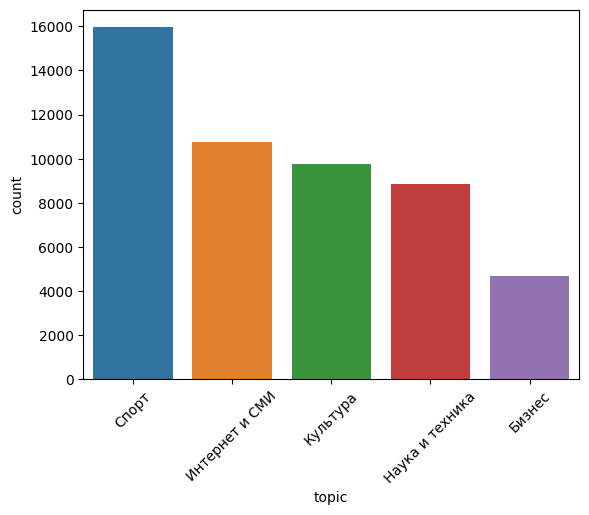

In [5]:
plt.figure()
sns.countplot(data=data, x='topic', order=data['topic'].value_counts().index)
plt.xlabel('topic')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [22]:
data = data.dropna(subset=['text'])
data

,title,text,topic,topic_d
0,Уволенный после извинений перед Мединским прод...,"Продюсер Марек Чункевич, уволенный с польского...",Интернет и СМИ,2
1,После драки двухсот фанатов «Спартака» и ЦСКА ...,Столичные полицейские задержали четырех челове...,Спорт,1
2,ВОЗ призвала запретить детям смотреть фильмы с...,Всемирная организация здравоохранения (ВОЗ) пр...,Культура,3
3,Строительством «Зенит-Арены» займется штаб Пол...,Губернатор Санкт-Петербурга Георгий Полтавченк...,Спорт,1
4,В России построят собственную многоразовую рак...,Роскосмос создаст многоразовую ракету-носитель...,Наука и техника,4
...,...,...,...,...
49994,Российский боец UFC включен в Книгу рекордов Г...,Российский боец смешанного стиля (MMA) Алексей...,Спорт,1
49995,Бывший чемпион UFC не выдержал кровопролития и...,Американский боец смешанного стиля (MMA) Фрэн...,Спорт,1
49996,Моуринью сравнил футболистов с мебелью,Главный тренер «Манчестер Юнайтед» Жозе Моурин...,Спорт,1
49997,Путин предостерег от запретов рэп-концертов,"Президент России Владимир Путин, выступая на з...",Культура,3


## Разделите данные на обучающую и валидационную выборки

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [24]:
X = data['text']
#X = v.fit_transform(data['text'].values.astype('U'))
y = data['topic_d']
#y = v.fit_transform(data['topic'].values.astype('U'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
X_test

26446    Российский хип-хоп-исполнитель Noize MC (насто...
32715    Специалисты НАСА наблюдали мощное авроральное ...
15937    Популярная американская треш-метал группа Meta...
8677     Бывший президент Международной федерации футбо...
45446    Депутат Госдумы от ЛДПР Игорь Лебедев прокомме...
                               ...                        
30033    В Калифорнии (США) во время подготовки к прямо...
17707    Пользователи сети посмеялись над 6-килограммов...
45236    Нападающий петербургского «Зенита» Артем Дзюба...
35298    Британские ученые раскрыли происхождение йети ...
9274     Футбольный клуб «Гранада», выступающий в испан...
Name: text, Length: 10000, dtype: object

## При выполении дальнейших заданий поэксперементируйте с методами векторизации текста:


1. [Bag of Words](https://habr.com/ru/companies/mlclass/articles/270591/) (BOW): Bag of Words представляет текст как вектор, где каждый элемент обозначает количество вхождений конкретного слова в тексте. Процесс включает в себя создание словаря всех уникальных слов в корпусе текстов и подсчет частоты встречаемости каждого слова в отдельных текстах.

2. [TF-IDF](https://habr.com/ru/companies/otus/articles/755772/) (Term Frequency-Inverse Document Frequency): TF-IDF учитывает не только количество вхождений слова в текст, но и частоту его встречаемости в других текстах. Он вычисляет вес слова, умножая его частоту встречаемости (term frequency) на обратную частоту документа (inverse document frequency). Это позволяет снизить вес наиболее часто встречающихся слов, которые могут быть менее информативными.

3. Word Embeddings (например, [Word2Vec](https://habr.com/ru/articles/446530/) и [GloVe](https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6)): Word Embeddings используют нейронные сети для создания векторных представлений слов, которые учитывают семантическую близость между словами. Нейронные сети обучаются на больших текстовых корпусах и захватывают семантические отношения между словами, что позволяет представить слова в векторном пространстве.

4. One-Hot Encoding: One-Hot Encoding преобразует каждое слово в уникальный вектор, где все элементы равны нулю, за исключением одного, который равен единице. Каждый вектор соответствует отдельному слову и используется для представления его в пространстве признаков.

5. [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Count Vectorizer подсчитывает количество раз, которое каждое слово встречается в тексте. Он создает вектор, в котором каждый элемент соответствует количеству вхождений конкретного слова в текст.

6. [Hashing Vectorizer](https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/): Hashing Vectorizer преобразует каждое слово в уникальный числовой идентификатор с помощью хеширования. Он использует хеш-функцию для преобразования слова в числовое значение, которое затем используется в векторном представлении.

7. [Doc2Vec](https://habr.com/ru/articles/599513/): Doc2Vec является расширением метода Word2Vec и позволяет получить векторное представление не только отдельных слов, но и целых документов или текстов. Алгоритм обучает нейронную сеть, которая учитывает контекст и порядок слов в предложении, чтобы получить векторное представление документа. Это позволяет сравнивать и измерять семантическую близость между целыми текстовыми документами.

# Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи

In [9]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [10]:
def report(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("Отчёт о классификации:")
    print(classification_report(y_test, y_pred))

In [26]:
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [27]:
y_pred_NB=clf_NaiveBaised.predict(X_test)

## Вывод матрицы ошибок:

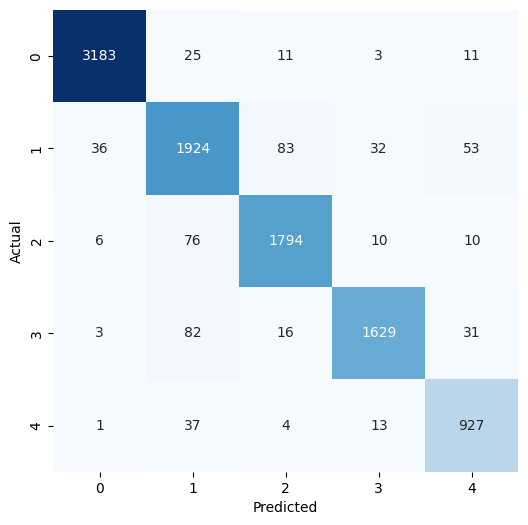

Отчёт о классификации:
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      3233
           2       0.90      0.90      0.90      2128
           3       0.94      0.95      0.94      1896
           4       0.97      0.93      0.94      1761
           5       0.90      0.94      0.92       982

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



In [28]:
report(y_pred_NB, y_test)

## Оценка точности:

In [29]:
naive_acc=accuracy_score(y_test,y_pred)
naive_acc

0.9457

# Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи

In [30]:
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [31]:
y_pred_SVM=clf_svm.predict(X_test)

## Вывод матрицы ошибок:

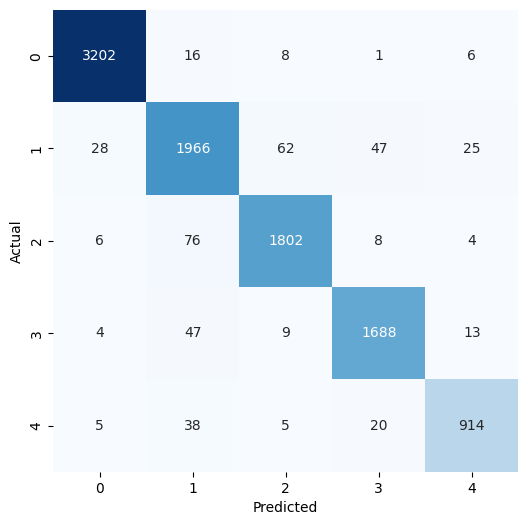

Отчёт о классификации:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3233
           2       0.92      0.92      0.92      2128
           3       0.96      0.95      0.95      1896
           4       0.96      0.96      0.96      1761
           5       0.95      0.93      0.94       982

    accuracy                           0.96     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.96      0.96     10000



In [32]:
report(y_pred_SVM, y_test)

## Оценка точности:

In [33]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc

0.9572

# Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

In [34]:
clf_DecisionTree= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])

clf_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [35]:
y_pred_DT=clf_DecisionTree.predict(X_test)

## Вывод матрицы ошибок:

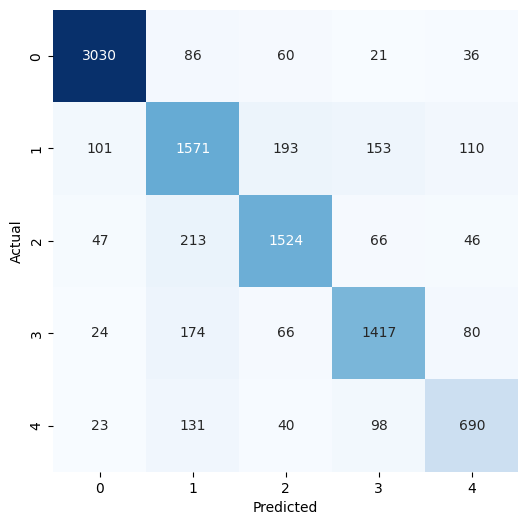

Отчёт о классификации:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3233
           2       0.72      0.74      0.73      2128
           3       0.81      0.80      0.81      1896
           4       0.81      0.80      0.81      1761
           5       0.72      0.70      0.71       982

    accuracy                           0.82     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.82      0.82      0.82     10000



In [36]:
report(y_pred_DT, y_test)

## Оценка точности:

In [37]:
dt_acc=accuracy_score(y_test,y_pred_DT)
dt_acc

0.8232

# Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

In [38]:
clf_rf= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

clf_rf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [39]:
y_pred_RF=clf_rf.predict(X_test)

## Вывод матрицы ошибок:

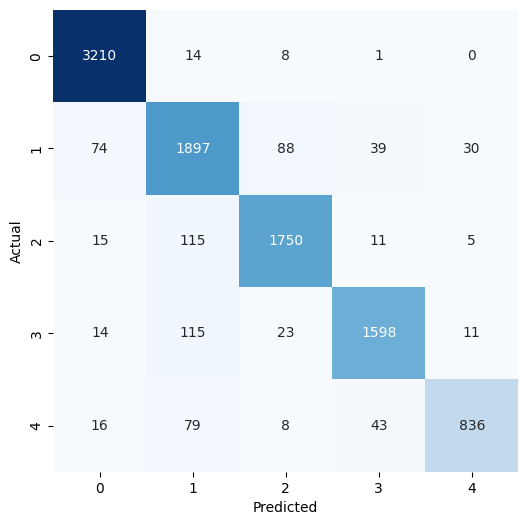

Отчёт о классификации:
              precision    recall  f1-score   support

           1       0.96      0.99      0.98      3233
           2       0.85      0.89      0.87      2128
           3       0.93      0.92      0.93      1896
           4       0.94      0.91      0.93      1761
           5       0.95      0.85      0.90       982

    accuracy                           0.93     10000
   macro avg       0.93      0.91      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [40]:
report(y_pred_RF, y_test)

## Оценка точности:

In [41]:
rf_acc=accuracy_score(y_test,y_pred_RF)
rf_acc

0.9291

# Задание 5. Обучите модели машинного обучения для решения задачи классификации текстов, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравните их точность и быстродействие.

In [42]:
import time
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.1 MB/s eta 0:00:00


In [53]:
models = {
    'CatBoost': make_pipeline(TfidfVectorizer(), CatBoostClassifier()),
    'LightGBM': make_pipeline(TfidfVectorizer(), LGBMClassifier()),
    'XGBoost': make_pipeline(TfidfVectorizer(), XGBClassifier()),
    'AdaBoost': make_pipeline(TfidfVectorizer(), AdaBoostClassifier())
}

In [54]:
train_time = {}
acc = {}

In [1]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time[name] = end_time - start_time

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc[name] = accuracy

NameError: ignored

In [ ]:
print("Точность обучения:")
for name, accuracy in acc.items():
    print(f"{name}: {accuracy:.4f}")

print("\nВремя обучения:")
for name, time_taken in train_time.items():
    print(f"{name}: {time_taken:.4f} секунд")

# Подведите общие итоги

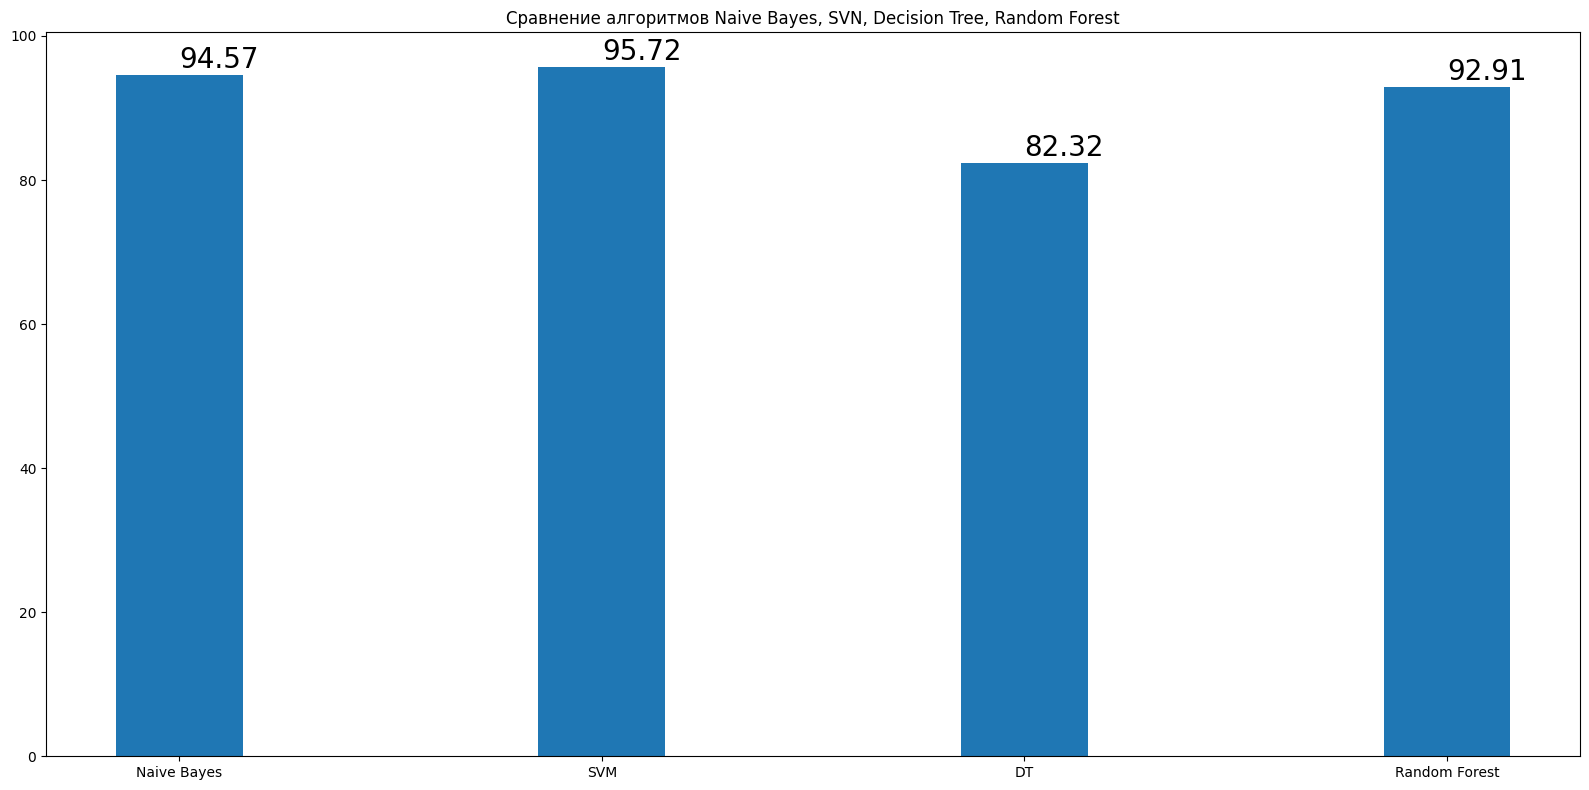

In [52]:
menMeans = np.array([naive_acc,svm_acc,dt_acc,rf_acc])*100
ind = ['Naive Bayes','SVM','DT','Random Forest']
fig, ax = plt.subplots(figsize = (16,8))
ax.bar(ind,menMeans,width=0.3)
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.title('Сравнение алгоритмов Naive Bayes, SVN, Decision Tree, Random Forest')
plt.tight_layout()
plt.show()

In [47]:
print("Точность обучения классических алгоритмов:")
accs = [naive_acc,svm_acc,dt_acc,rf_acc]
for name, acc in zip(ind, accs):
    print(f'{name}: точность {acc:.4f}')

Точность обучения классических алгоритмов:
Naive Bayes: точность 0.9457
SVM: точность 0.9572
DT: точность 0.8232
Random Forest: точность 0.9291


In [ ]:
print("Точность обучения boosting алгоритмов:")
for name, accuracy in acc.items():
    print(f"{name}: {accuracy:.4f}")